# Compare the CIGALE results of EMU and non-EMU sources

In [ ]:
observatory = '/data/mfonseca/'
my_computer = '/home/polaris/Lab_Astro/data/'

directory = my_computer

## Import Libraries

In [19]:
import numpy as np
import pandas as pd
import math


# Astropy
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
# Use the Planck 2020/2018 cosmology
from astropy.cosmology import Planck18 as cosmo

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Seaborn
import seaborn as sns

## Import results files from EMU and non-EMU sources and select objects with x²_red < 5

In [ ]:
emu_sources = pd.read_csv('/home/polaris/Lab_Astro/data/cigale/emu_data/out_withAGN/results.txt', sep='\s+')
nonemu_sources = pd.read_csv('/home/polaris/Lab_Astro/data/cigale/nonemu_data/cigale_redshifts/results.txt', sep='\s+')
nonemu_prototypes = 

,bayes.agn.EBV,bayes.agn.EBV_err,bayes.agn.Mcl,bayes.agn.Mcl_err,bayes.agn.R,bayes.agn.R_err,bayes.agn.delta,bayes.agn.delta_err,bayes.agn.disk_type,bayes.agn.disk_type_err,...,best.ctio.decam.g,best.ctio.decam.r,best.ctio.decam.i,best.ctio.decam.z,best.paranal.vircam.Y,best.paranal.vircam.J,best.paranal.vircam.H,best.paranal.vircam.Ks,best.wise.W1,best.wise.W2
count,3.530000e+03,3.530000e+03,3.530000e+03,3.530000e+03,3.530000e+03,3.530000e+03,3530.0,3530.0,3.530000e+03,3.530000e+03,...,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000
mean,3.000000e-02,8.521717e-17,9.700000e-01,2.817908e-15,2.000000e+01,5.723218e-14,0.0,0.0,2.000000e+00,5.653736e-15,...,0.032551,0.065007,0.091659,0.117028,0.137473,0.173163,0.212910,0.240667,0.181315,0.156266
std,7.447808e-17,6.539056e-17,2.266408e-15,2.248972e-15,4.564264e-14,4.466377e-14,0.0,0.0,4.470301e-15,4.446159e-15,...,0.094208,0.159573,0.206656,0.255819,0.296422,0.341733,0.396154,0.386803,0.225876,0.238432
min,3.000000e-02,1.589150e-18,9.700000e-01,3.351555e-17,2.000000e+01,6.679679e-17,0.0,0.0,2.000000e+00,2.191752e-17,...,0.000055,0.000264,0.000845,0.002229,0.002702,0.005176,0.007026,0.009365,0.014410,0.012156
25%,3.000000e-02,3.797779e-17,9.700000e-01,1.198081e-15,2.000000e+01,2.514323e-14,0.0,0.0,2.000000e+00,2.463179e-15,...,0.001577,0.004613,0.010856,0.017026,0.021089,0.029765,0.043738,0.059131,0.077001,0.063469
50%,3.000000e-02,6.455962e-17,9.700000e-01,2.102160e-15,2.000000e+01,4.346636e-14,0.0,0.0,2.000000e+00,4.250251e-15,...,0.004900,0.014913,0.028417,0.039739,0.047381,0.064552,0.091038,0.113797,0.122724,0.099206
75%,3.000000e-02,1.137427e-16,9.700000e-01,3.774207e-15,2.000000e+01,7.732971e-14,0.0,0.0,2.000000e+00,7.595524e-15,...,0.021607,0.057163,0.085043,0.107825,0.124653,0.165697,0.210459,0.258162,0.204153,0.167810
max,3.000000e-02,5.084257e-16,9.700000e-01,1.866457e-14,2.000000e+01,4.369978e-13,0.0,0.0,2.000000e+00,3.926396e-14,...,1.768727,2.645306,3.555946,4.611000,5.514675,6.280091,7.427902,6.664236,5.052985,7.268420


Select EMU and non-EMU sources with a x²_red less than 5 , to analyse sources with a good fitting.

In [18]:
best_matches_emu = emu_sources['best.reduced_chi_square'] <= 5.0
emu_sources_best = emu_sources[best_matches_emu]
print(f'Number of emu objects with x²_red <= 5: {len(emu_sources_best)}')


best_matches_nonemu = nonemu_sources['best.reduced_chi_square'] <= 5.0
nonemu_sources_best = nonemu_sources[best_matches_nonemu]
print(f'Number of non-emu objects with x²_red <= 5: {len(nonemu_sources_best)}')

Number of emu objects with x²_red <= 5: 3497
Number of non-emu objects with x²_red <= 5: 3032


## Compare EMU and non-EMU sources

### Histogram of EMU and non-EMU sources

### Density plot of EMU and non-EMU sources

In [44]:
def plot_log_kde_2rows_sns(df1, df2, columns, x_labels, legend_positions, labels=("DF1", "DF2"), figsize=(15, 8)):
    """
    Plot KDE (density) curves using Seaborn for specified columns from two DataFrames in 2 rows.
    Uses log scaling on axes where appropriate.

    Parameters:
    - df1, df2: pandas DataFrames
    - columns: list of column names to plot (must exist in both)
    - x_labels: list of x-axis labels (same length as columns)
    - labels: tuple of legend labels for df1 and df2
    - figsize: tuple for figure size
    """
    n = len(columns)
    nrows = 2
    ncols = math.ceil(n / nrows)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)

    for i, col in enumerate(columns):
        row = i // ncols
        col_idx = i % ncols
        ax = axes[row, col_idx]
        
        data1 = df1[col].dropna()
        data2 = df2[col].dropna()

        if 'bayes.agn.fracAGN' in col:
            # Linear scale
            sns.kdeplot(data1, ax=ax, label=labels[0], color='blue', fill=True, common_norm=False)
            sns.kdeplot(data2, ax=ax, label=labels[1], color='red', fill=True, common_norm=False)
        else:
            # Log scale (filter > 0)
            data1 = data1[data1 > 0]
            data2 = data2[data2 > 0]
            sns.kdeplot(np.log10(data1), ax=ax, label=labels[0], color='blue', fill=True, common_norm=False)
            sns.kdeplot(np.log10(data2), ax=ax, label=labels[1], color='red', fill=True, common_norm=False)
            ax.set_xlabel(x_labels[i] + " (log₁₀)")
            ax.set_xticks(np.arange(np.floor(np.log10(data1.min())), np.ceil(np.log10(data1.max())) + 1))
            ax.set_xticklabels([f"$10^{int(x)}$" for x in ax.get_xticks()])
            ax.set_xlim(left=np.log10(min(data1.min(), data2.min())))

        ax.set_title(col)
        ax.set_ylabel('Density')
        ax.legend(loc = legend_positions[i])

    # Hide unused subplots
    for j in range(n, nrows * ncols):
        row = j // ncols
        col_idx = j % ncols
        axes[row, col_idx].axis('off')

    plt.tight_layout()
    plt.show()

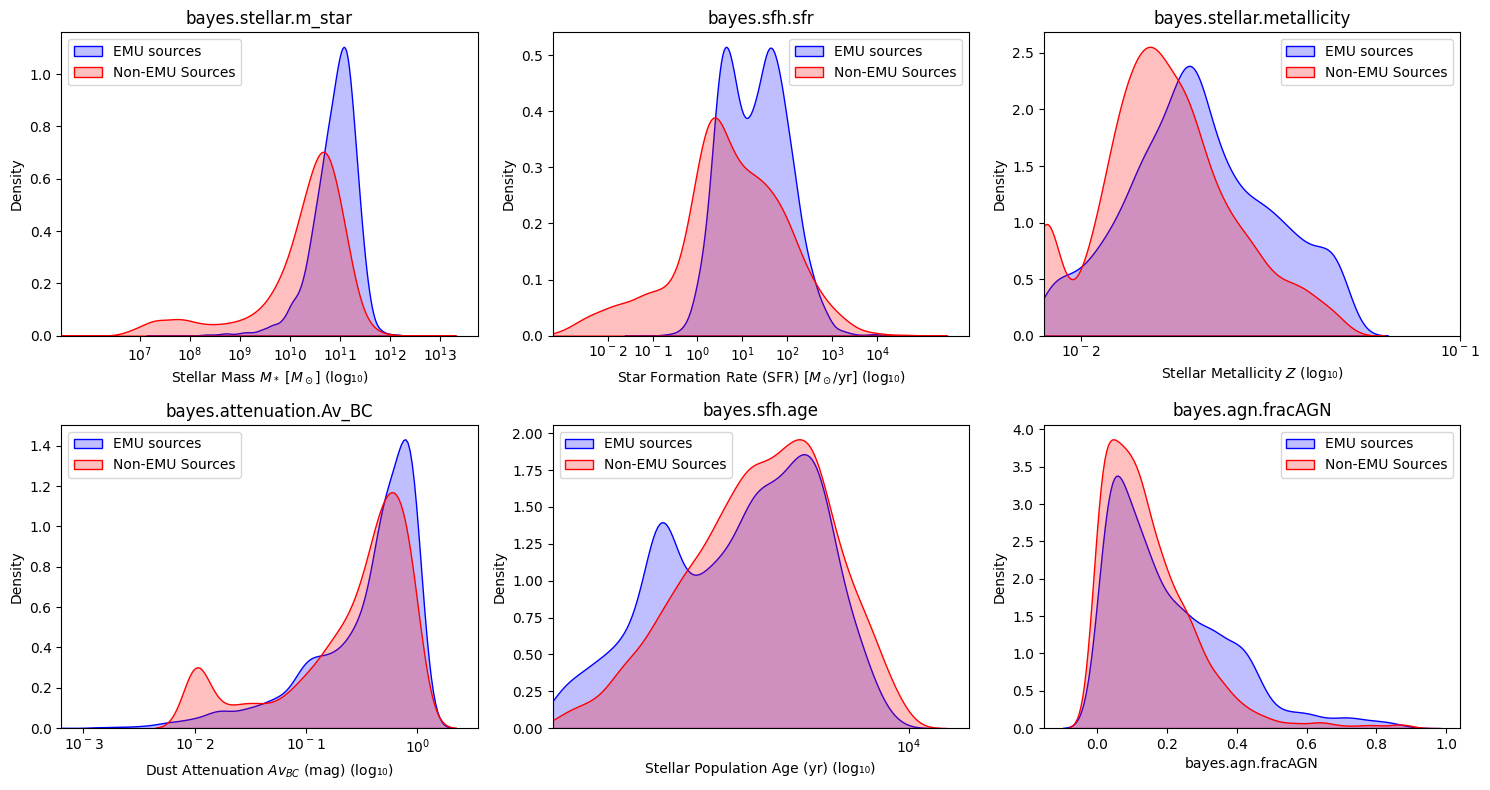

In [47]:
legend_positions = [
    'upper left', 
    'upper right',   
    'upper right',           
    'upper left',         
    'upper left',
    'upper right' 
]



plot_log_kde_2rows_sns(
    df1=emu_sources_best,
    df2=nonemu_sources_best,
    columns=[
        'bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.stellar.metallicity',
        'bayes.attenuation.Av_BC', 'bayes.sfh.age', 'bayes.agn.fracAGN'
    ],
    x_labels=[
        r"Stellar Mass $M_*$ [$M_\odot$]",
        r"Star Formation Rate (SFR) [$M_\odot$/yr]",
        r"Stellar Metallicity $Z$",
        r"Dust Attenuation $Av_{BC}$ (mag)",
        r"Stellar Population Age (yr)",
        r"AGN Fraction"
    ],
    labels=("EMU sources", "Non-EMU Sources"),
    legend_positions=legend_positions
)